<a href="https://colab.research.google.com/github/deliabel/CodeDivisionWorksheets/blob/main/Air_Quality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean and wrangle air quality data

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





### Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i  This is a .csv file  

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

In [ ]:
import pandas as pd

In [ ]:
# Read the dataset into a dataframe, skipping the first row * works
url2020 = 'https://raw.githubusercontent.com/deliabel/CodeDivisionWorksheets/main/data%20sets/NO2-measured-data-2020-2021-Chatham-Roadside.csv'
measured_20df = pd.read_csv(url2020, skiprows = 1)
measured_20df

,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,1:00,41.07113,V µg/m³
1,01/01/2020,2:00,38.9604,V µg/m³
2,01/01/2020,3:00,35.12313,V µg/m³
3,01/01/2020,4:00,35.85312,V µg/m³
4,01/01/2020,5:00,32.10503,V µg/m³
...,...,...,...,...
8779,31/12/2020,20:00,24.4694,V µg/m³
8780,31/12/2020,21:00,22.62313,V µg/m³
8781,31/12/2020,22:00,20.3186,V µg/m³
8782,31/12/2020,23:00,21.47177,V µg/m³


In [ ]:
# additional: replaces midnight time, making it match the rest
# second data set doesn't have this problem
# although, isn't midnight 00:00 not 24:00?
# --> Aparrently, midnight is usually only 24:00 if it is the end of something, eg a journey or opening hours, or to specify a full day 00:00 - 24:00
# and more importantly, pandas and datetime seem to expect 00:00
# measured_20df = measured_20df.replace('24:00:00', '00:00')
# measured_21df = measured_20df.replace('24:00', '00:00')
measured_20df = measured_20df.replace('24:00:00', '24:00')
measured_20df.tail(26)

,Date,Time,Nitrogen dioxide,Status
8758,30/12/2020,23:00,38.47493,V µg/m³
8759,30/12/2020,24:00,42.42882,V µg/m³
8760,31/12/2020,1:00,38.30502,V µg/m³
8761,31/12/2020,2:00,36.0854,V µg/m³
8762,31/12/2020,3:00,39.09547,V µg/m³
8763,31/12/2020,4:00,34.48578,V µg/m³
8764,31/12/2020,5:00,36.03229,V µg/m³
8765,31/12/2020,6:00,36.22785,V µg/m³
8766,31/12/2020,7:00,36.71574,V µg/m³
8767,31/12/2020,8:00,40.34785,V µg/m³


In [ ]:
# (extra: this is to check if any columns have null data, and to find out which type of data is in each column)
measured_20df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB


In [ ]:
# Convert dates to date format * works
measured_20df['Date']= pd.to_datetime(measured_20df['Date'], dayfirst = True)
measured_20df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8784 non-null   datetime64[ns]
 1   Time              8784 non-null   object        
 2   Nitrogen dioxide  8784 non-null   object        
 3   Status            8784 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 274.6+ KB


In [ ]:
# Remove rows with nodata in the Nitrogen dioxide column * works
# measured_20df = measured_20df[measured_20df['Nitrogen dioxide'] != 'nodata']
measured_20df = measured_20df.loc[measured_20df['Nitrogen dioxide'] != 'nodata'] # I added loc, not sure if this helps with the copy vs view thing
measured_20df

,Date,Time,Nitrogen dioxide,Status
0,2020-01-01,1:00,41.07113,V µg/m³
1,2020-01-01,2:00,38.9604,V µg/m³
2,2020-01-01,3:00,35.12313,V µg/m³
3,2020-01-01,4:00,35.85312,V µg/m³
4,2020-01-01,5:00,32.10503,V µg/m³
...,...,...,...,...
8779,2020-12-31,20:00,24.4694,V µg/m³
8780,2020-12-31,21:00,22.62313,V µg/m³
8781,2020-12-31,22:00,20.3186,V µg/m³
8782,2020-12-31,23:00,21.47177,V µg/m³


In [ ]:
# (extra: checking there are no nodata rows left) <--- remove later?
# (as a second check, if I run this first, there are 152 rows: 8784 - 152 = 8632, which is the new length of the df)
measured_20df_check = measured_20df[measured_20df['Nitrogen dioxide'] == 'nodata']
measured_20df_check


,Date,Time,Nitrogen dioxide,Status


In [ ]:
# Convert the Nitrogen dioxide levels values to float type * finally works!!!
measured_20df = measured_20df.astype({'Nitrogen dioxide': float,})
measured_20df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8632 non-null   datetime64[ns]
 1   Time              8632 non-null   object        
 2   Nitrogen dioxide  8632 non-null   float64       
 3   Status            8632 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 337.2+ KB


In [ ]:
# Sort by Nitrogen dioxide level * works
# I'm not sure why this is helpful, I'll add it back if I need to
#measured_20df = measured_20df.sort_values('Nitrogen dioxide')
#measured_20df

In [ ]:
# Create a new column for 'Weekdays' (use df['Date'].dt.weekday) * works
measured_20df.insert(1, 'Weekdays', measured_20df['Date'].dt.weekday)
measured_20df.head(3)

,Date,Weekdays,Time,Nitrogen dioxide,Status
0,2020-01-01,2,1:00,41.07113,V µg/m³
1,2020-01-01,2,2:00,38.96040,V µg/m³
2,2020-01-01,2,3:00,35.12313,V µg/m³


In [ ]:
# (extra: to check that there are labels for 7 days, and that all the days are included: monday is 0 and sunday is 6)
measured_20df['Weekdays'].unique()

array([2, 3, 4, 5, 6, 0, 1])

In [ ]:
# Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2) * works
measured_20df = measured_20df.rename({'Nitrogen dioxide': "NO2 Level (V ug/m3)"}, axis="columns")
measured_20df.head(3)

,Date,Weekdays,Time,NO2 Level (V ug/m3),Status
0,2020-01-01,2,1:00,41.07113,V µg/m³
1,2020-01-01,2,2:00,38.96040,V µg/m³
2,2020-01-01,2,3:00,35.12313,V µg/m³


In [ ]:
# Remove the Status column * works
measured_20df = measured_20df.drop('Status', axis = 1)
measured_20df

,Date,Weekdays,Time,NO2 Level (V ug/m3)
0,2020-01-01,2,1:00,41.07113
1,2020-01-01,2,2:00,38.96040
2,2020-01-01,2,3:00,35.12313
3,2020-01-01,2,4:00,35.85312
4,2020-01-01,2,5:00,32.10503
...,...,...,...,...
8779,2020-12-31,3,20:00,24.46940
8780,2020-12-31,3,21:00,22.62313
8781,2020-12-31,3,22:00,20.31860
8782,2020-12-31,3,23:00,21.47177


### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name.

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

In [ ]:
# clean and wrangle the second dataset in the same way as the first. Use the code cell below. Give the second dataset a different name.
'''
I have just copied this cleaning code down, with the new df name
'''

'\nI have just copied this cleaning code down, with the new df name\n'

In [ ]:
# Read the dataset into a dataframe, skipping the first row *
url2021 = 'https://raw.githubusercontent.com/deliabel/CodeDivisionWorksheets/main/data%20sets/NO2-measured-data-2021-2022-Chatham-Roadside.csv'
measured_21df = pd.read_csv(url2021, skiprows = 1)
measured_21df

,Date,Time,Nitrogen dioxide,Status
0,01/01/2021,01:00,16.58269,V µg/m³
1,01/01/2021,02:00,14.00478,V µg/m³
2,01/01/2021,03:00,15.35208,V µg/m³
3,01/01/2021,04:00,13.49688,V µg/m³
4,01/01/2021,05:00,12.47511,V µg/m³
...,...,...,...,...
8755,31/12/2021,20:00,12.51492,P µg/m³
8756,31/12/2021,21:00,14.00046,P µg/m³
8757,31/12/2021,22:00,10.04780,P µg/m³
8758,31/12/2021,23:00,3.49557,P µg/m³


In [ ]:
# (extra: this is to check if any columns have null data, and to find out which type of data is in each column)
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8760 non-null   object
 1   Time              8760 non-null   object
 2   Nitrogen dioxide  8760 non-null   object
 3   Status            8760 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB


In [ ]:
# Convert dates to date format *
measured_21df['Date']= pd.to_datetime(measured_21df['Date'], dayfirst = True)
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8760 non-null   datetime64[ns]
 1   Time              8760 non-null   object        
 2   Nitrogen dioxide  8760 non-null   object        
 3   Status            8760 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 273.9+ KB


In [ ]:
# Remove rows with nodata in the Nitrogen dioxide column *
# measured_21df = measured_21df.loc[measured_21df['Nitrogen dioxide'] != 'nodata']
measured_21df = measured_21df[measured_21df['Nitrogen dioxide'] != 'nodata']
measured_21df

,Date,Time,Nitrogen dioxide,Status
0,2021-01-01,01:00,16.58269,V µg/m³
1,2021-01-01,02:00,14.00478,V µg/m³
2,2021-01-01,03:00,15.35208,V µg/m³
3,2021-01-01,04:00,13.49688,V µg/m³
4,2021-01-01,05:00,12.47511,V µg/m³
...,...,...,...,...
8755,2021-12-31,20:00,12.51492,P µg/m³
8756,2021-12-31,21:00,14.00046,P µg/m³
8757,2021-12-31,22:00,10.04780,P µg/m³
8758,2021-12-31,23:00,3.49557,P µg/m³


In [ ]:
# (extra: checking there are no nodata rows left) <--- remove later?
measured_21df_check = measured_21df[measured_21df['Nitrogen dioxide'] == 'nodata']
measured_21df_check

,Date,Time,Nitrogen dioxide,Status


In [ ]:
# Convert the Nitrogen dioxide levels values to float type *
measured_21df = measured_21df.astype({'Nitrogen dioxide': float,})
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8680 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8680 non-null   datetime64[ns]
 1   Time              8680 non-null   object        
 2   Nitrogen dioxide  8680 non-null   float64       
 3   Status            8680 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 339.1+ KB


In [ ]:
# Sort by Nitrogen dioxide level *
# I'm not sure why this is helpful, it also messes up the concatonated df. I'll add it back if I need to
#measured_21df = measured_21df.sort_values('Nitrogen dioxide')
#measured_21df

In [ ]:
# Create a new column for 'Weekdays' (use df['Date'].dt.weekday) *
measured_21df.insert(1, 'Weekdays', measured_21df['Date'].dt.weekday)
measured_21df.head(3)

,Date,Weekdays,Time,Nitrogen dioxide,Status
0,2021-01-01,4,01:00,16.58269,V µg/m³
1,2021-01-01,4,02:00,14.00478,V µg/m³
2,2021-01-01,4,03:00,15.35208,V µg/m³


In [ ]:
# (extra: to check that there are labels for 7 days, and that all the days are included: monday is 0 and sunday is 6)
measured_21df['Weekdays'].unique()

array([4, 5, 6, 0, 1, 2, 3])

In [ ]:
# Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2) *
measured_21df = measured_21df.rename({'Nitrogen dioxide': "NO2 Level (V ug/m3)"}, axis="columns")
measured_21df.head(3)

,Date,Weekdays,Time,NO2 Level (V ug/m3),Status
0,2021-01-01,4,01:00,16.58269,V µg/m³
1,2021-01-01,4,02:00,14.00478,V µg/m³
2,2021-01-01,4,03:00,15.35208,V µg/m³


In [ ]:
# Remove the Status column *
measured_21df = measured_21df.drop('Status', axis = 1) # what do these negative values mean? there are 9.
measured_21df

,Date,Weekdays,Time,NO2 Level (V ug/m3)
0,2021-01-01,4,01:00,16.58269
1,2021-01-01,4,02:00,14.00478
2,2021-01-01,4,03:00,15.35208
3,2021-01-01,4,04:00,13.49688
4,2021-01-01,4,05:00,12.47511
...,...,...,...,...
8755,2021-12-31,4,20:00,12.51492
8756,2021-12-31,4,21:00,14.00046
8757,2021-12-31,4,22:00,10.04780
8758,2021-12-31,4,23:00,3.49557


#### *end of cleaning*
---


In [ ]:
# Concatenate the two datasets to expand it to 2020 and 2021.
measuredNO2_df = pd.concat([measured_20df, measured_21df], ignore_index = True)
print('shape:', measuredNO2_df.shape)
measuredNO2_df

shape: (17312, 4)


,Date,Weekdays,Time,NO2 Level (V ug/m3)
0,2020-01-01,2,1:00,41.07113
1,2020-01-01,2,2:00,38.96040
2,2020-01-01,2,3:00,35.12313
3,2020-01-01,2,4:00,35.85312
4,2020-01-01,2,5:00,32.10503
...,...,...,...,...
17307,2021-12-31,4,20:00,12.51492
17308,2021-12-31,4,21:00,14.00046
17309,2021-12-31,4,22:00,10.04780
17310,2021-12-31,4,23:00,3.49557


In [ ]:
import matplotlib.pyplot as plt

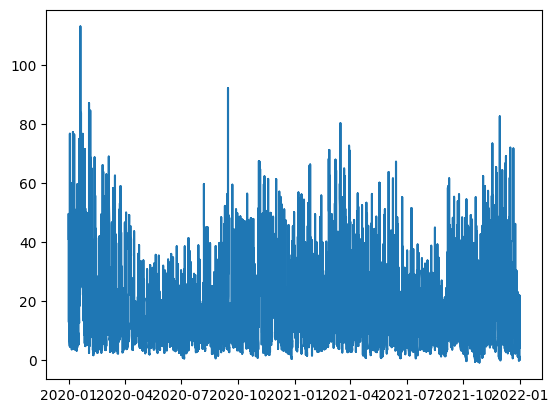

In [ ]:
# (extra: seeing what the data looks like, getting an idea of patterns)
x_dates = measuredNO2_df['Date']
y_NO2 = measuredNO2_df['NO2 Level (V ug/m3)']
plt.plot(x_dates, y_NO2)
plt.show()
# plot needs to be longer and have months as labels, but still have points for each week or day, at least
# there might be a difference between summer and winter

In [ ]:
# group the data by Weekdays and show summary statistics by day of the week.
measuredNO2_df.groupby('Weekdays')['NO2 Level (V ug/m3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekdays,,,,,,,,
0,2452.0,19.019897,13.566948,0.58930,8.944637,15.91839,26.016740,113.06189
1,2434.0,19.862832,13.623132,-0.10519,9.677307,16.66992,27.045835,92.13063
2,2485.0,21.569402,13.843067,-0.77743,10.894910,18.47115,30.186290,84.55297
3,2483.0,19.822405,12.873919,-0.13101,10.190015,16.82392,26.306000,72.00084
4,2500.0,20.776520,13.236096,0.03299,10.690697,18.00050,28.146380,76.72297
5,2494.0,15.905960,10.595521,0.75690,8.021902,13.60438,20.842495,74.93681
6,2464.0,13.160879,8.851133,-0.41740,6.782293,11.11951,16.998405,58.31275


In [ ]:
# mean by day of the week
meanNO2_days = measuredNO2_df.groupby('Weekdays')['NO2 Level (V ug/m3)'].mean()
meanNO2_days

Weekdays
0    19.019897
1    19.862832
2    21.569402
3    19.822405
4    20.776520
5    15.905960
6    13.160879
Name: NO2 Level (V ug/m3), dtype: float64

In [ ]:
# maximum by day of the week
maxNO2_days = measuredNO2_df.groupby('Weekdays')['NO2 Level (V ug/m3)'].max()
maxNO2_days

Weekdays
0    113.06189
1     92.13063
2     84.55297
3     72.00084
4     76.72297
5     74.93681
6     58.31275
Name: NO2 Level (V ug/m3), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

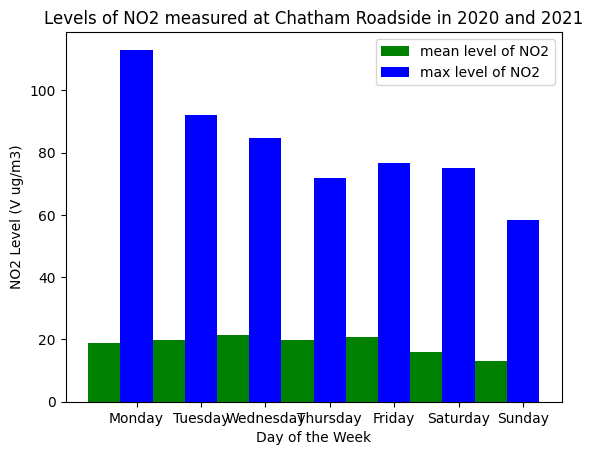

In [ ]:
# (extra: plot mean and max on a bar chart, to see if there might be a pattern over the week)

marks = maxNO2_days.keys() # this will do for now, I need to convert to actual day names
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#labels
#plt.bar(labels, maxNO2_days) #plt.bar(x axis, y axis)
#plt.show()

width = 0.5
fig, ax = plt.subplots()

ax.bar(marks, meanNO2_days, width, color = 'green', label='mean level of NO2')
ax.bar(marks + width, maxNO2_days, width, color='blue', label='max level of NO2')

ax.set(xticks = marks + width, xticklabels = labels,) #xlim=[2*width - 1, len(ind)]) # I found someone's code to do this, I understand most of it, but have not worked out spacing

plt.title('Levels of NO2 measured at Chatham Roadside in 2020 and 2021')
plt.xlabel('Day of the Week')
plt.ylabel('NO2 Level (V ug/m3)')
ax.legend(loc='upper right')

plt.show

#### *end of directed part*
---


In [ ]:
measuredNO2_df[["NO2 Level (V ug/m3)"]].describe() # negative value?

,NO2 Level (V ug/m3)
count,17312.000000
mean,18.590636
std,12.793750
min,-0.777430
25%,9.020180
50%,15.433880
75%,24.919745
max,113.061890


In [ ]:
# additional: replaces 'nodata' with None, might help with plots
# will put away for now
#measured_20df = measured_20df.replace('nodata', None)
#measured_20df.iloc[50:60]
#measured_20df.info()

## Ideas for statistics

####We have:
*   dates, throughout two entire years(?)
*   times of day (hourly?)
*   measurement of NO2
*   weekdays

####things I can do with just this set:
*   summary statistics
*   should put in a plot, if I can
*   trends over a year: could test summer vs winter, holidays like christmas
*   compare one year to the other
*   trends over a week: weekends vs weekdays
*   trends over a day: school run, rush hour (would need to convert the times too)
**   measurements are during covid on/off lockdowns, so work routines are interupted

####possible tests, would require additional data or to look up dates:
*   remember to exclude special weeks if comparing trends over a week
*   school holidays, other holidays/events?
*   could test NO2 vs lockdown dates?
*   check max NO2 against regulations
*   if there was weather data/ station from the same position, could relate to sunny days vs rainy or if wind speed was relevant

*   check data quality of results

#### possible changes to directed order:
* why order by Nitrogen dioxide? I can't think why this is helpful
* dad says sometimes helpful to include the null data when plotting, so could convert 'nodata' to NAN
* I think I thought of something else before, but I cant remember what it was.


## remember to make copy and then remove notes

plan list:

* make the directed part work * done
* look up how to plot, make a plot
* worksheet finished
* make a copy to seperate worksheet from new copt to turn into the project <- this evening
* save on github and add link
* annotate the whole thing: explain what cleaning code does, in one box above, with note in each code box. at end explain what summary statistics and visualisations and questions and why. then a summary/conclusion, with notes about what else could be done, and covid note.
* write up further ideas ^
* save project on github - this point is where it is acceptably finished. <- tomorrow 'end of day'
* then try to add at least one extra idea
* save a copy with notes if nessecary
* tidy up and remove any remaining notes
* save finally


### Helpful references
---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition)

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.


In [ ]:
# box of trouble...
# Convert the Nitrogen dioxide levels values to float type !! has a warning
'''
*** warning
<ipython-input-124-cf41e1133be9>:11: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured_20df['Nitrogen dioxide'] = measured_20df['Nitrogen dioxide'].astype(float)
'''
#adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
#titanic.groupby("Sex")["Age"].mean()
#df1.loc['d':, 'A':'C']

# found this: DataFrame.astype(dtype, copy=None, errors='raise') <--- copy = false might be the right thing? it says to be careful as changes can propogate to other objects
# also, I could change errors to 'ignore', and do this before the nodata bit if needed.

# better explaination: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas ... df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
# df = df.astype({"a": int, "b": complex})

#measured_20df['Nitrogen dioxide'] = measured_20df.loc[:,['Nitrogen dioxide']].astype(float) # the difference here is the df[column] not just df on the left.
#measured_20df['Nitrogen dioxide'] = measured_20df['Nitrogen dioxide'].astype(float)
#measured_20df['Nitrogen dioxide'] = pd.to_numeric(measured_20df['Nitrogen dioxide'])
#measured_20df[['Nitrogen dioxide']] = measured_20df[['Nitrogen dioxide']].apply(pd.to_numeric)
'''
this worked:
measured_20df = measured_20df.astype({'Nitrogen dioxide': float,})
measured_20df
'''

"\nthis worked:\nmeasured_20df = measured_20df.astype({'Nitrogen dioxide': float,})\nmeasured_20df\n"